In [25]:
from vibdata.datahandler import MFPT_raw, RPDBCS_raw, CWRU_raw, PU_raw, SEU_raw, XJTU_raw
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['figure.dpi'] = 128


root_dir = '../datasets'
cwru = CWRU_raw(root_dir)
mfpt = MFPT_raw(root_dir)
seu = SEU_raw(root_dir)
rpdbcs = RPDBCS_raw(root_dir, frequency_domain=True)
pu = PU_raw(root_dir)

datasets = [('cwru',cwru), ('mfpt',mfpt),('seu',seu),('pu',pu), ('rpdbcs',rpdbcs)]


In [65]:
D = XJTU_raw(root_dir)
# np.hstack(D[[0,1,5]]['signal']).T
# df = D.getMetaInfo()
pd.DataFrame(df.values.repeat(2,axis=0),columns = df.columns)
# df = df[df['fault'].notna()]
# pd.factorize(df['fault'])[0]

,file_name,bearing_code,normal,intensity,fault,sample_rate
0,35Hz12kN/Bearing1_1/1.csv,Bearing1_1,True,0,Outer Race,25600
1,35Hz12kN/Bearing1_1/1.csv,Bearing1_1,True,0,Outer Race,25600
2,35Hz12kN/Bearing1_1/2.csv,Bearing1_1,True,0,Outer Race,25600
3,35Hz12kN/Bearing1_1/2.csv,Bearing1_1,True,0,Outer Race,25600
4,35Hz12kN/Bearing1_1/3.csv,Bearing1_1,True,0,Outer Race,25600
...,...,...,...,...,...,...
18427,40Hz10kN/Bearing3_5/112.csv,Bearing3_5,False,100,Outer Race,25600
18428,40Hz10kN/Bearing3_5/113.csv,Bearing3_5,False,100,Outer Race,25600
18429,40Hz10kN/Bearing3_5/113.csv,Bearing3_5,False,100,Outer Race,25600
18430,40Hz10kN/Bearing3_5/114.csv,Bearing3_5,False,100,Outer Race,25600


In [44]:
D[[0,1,5]]

{'signal': array([       Horizontal_vibration_signals  Vertical_vibration_signals
        0                         -0.396395                   -0.038672
        1                         -0.123107                   -0.365901
        2                          0.988841                   -0.583780
        3                          0.006676                   -0.013411
        4                         -1.074386                    0.087607
        ...                             ...                         ...
        32763                      0.115049                    0.910497
        32764                     -0.838852                    0.377631
        32765                     -0.771129                    0.748706
        32766                     -0.012875                    0.444710
        32767                      1.068628                    0.906968
 
        [32768 rows x 2 columns]                                       ,
               Horizontal_vibration_signals  Vertic

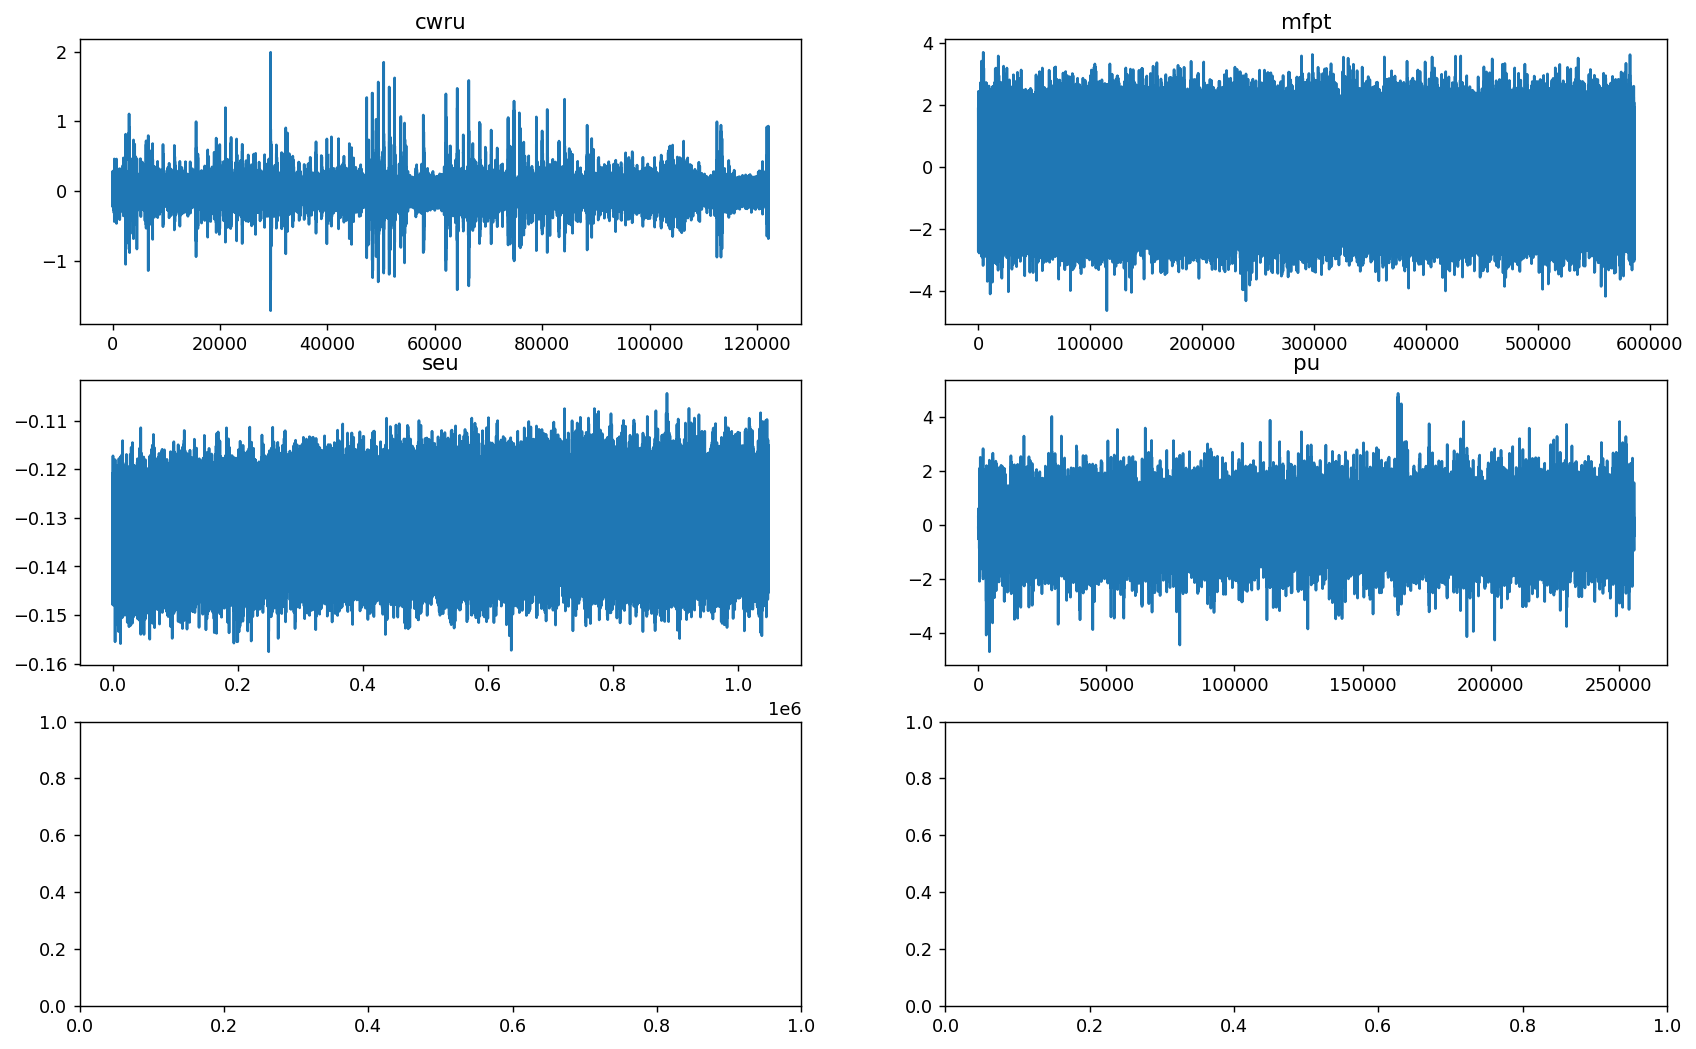

In [15]:
n = 0
_,axes = plt.subplots(3,2,figsize=(16,10))

for i, (name,D) in enumerate(datasets):
    j = i//2
    k = i % 2
    axes[j,k].plot(D[n]['signal']); 
    axes[j,k].set_title(name);

- SEU tem um sinal cuja a média é bem longe de 0! Provavelmente a unidade medida não é velocidade ou aceleração.

## FFT

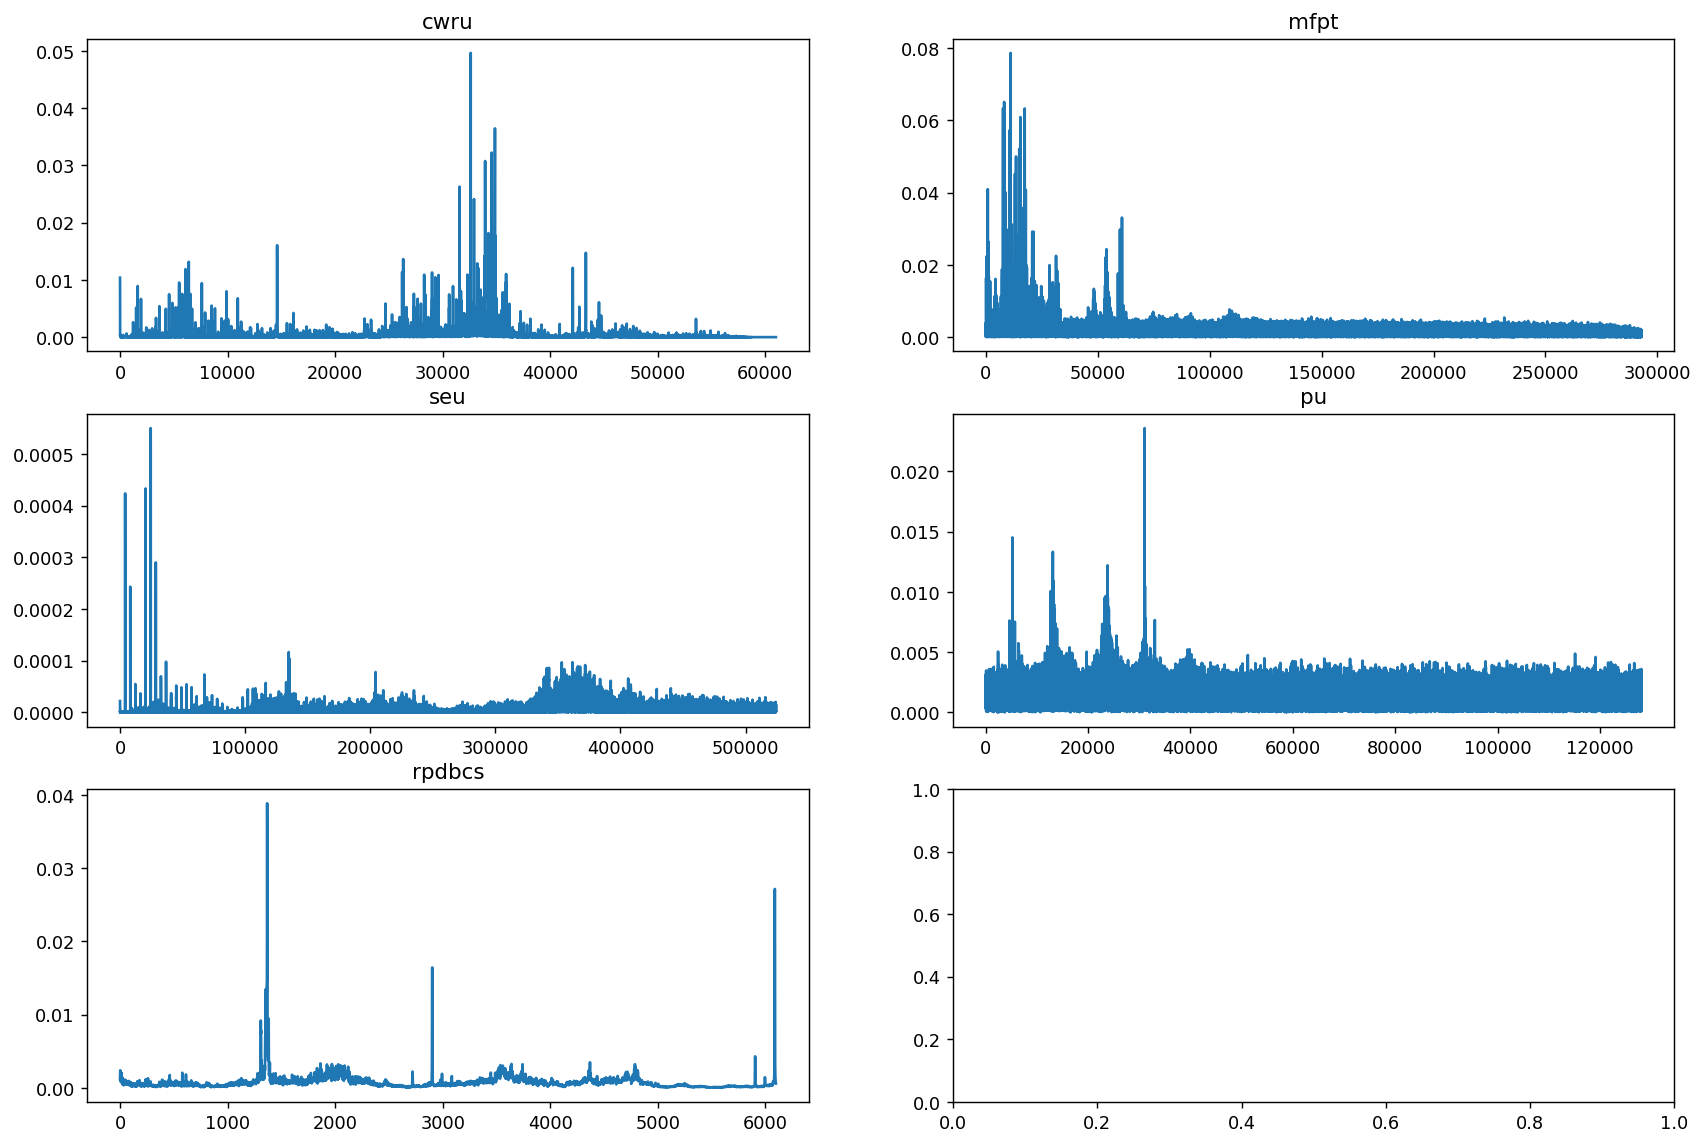

In [30]:
from vibdata.datahandler.transforms.signal import FFT

fft = FFT(discard_first_points=1)



n = 3
_,axes = plt.subplots(3,2,figsize=(16,11))

for i, (name,D) in enumerate(datasets):
    j = i//2
    k = i % 2
    if(name=='rpdbcs'):
        sig = D[n]['signal']
    else:
        sig = fft(D[[n]])['signal'][0]
    axes[j,k].plot(sig); 
    axes[j,k].set_title(name);
